In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets,layers,models,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image,ImageOps
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import tensorflow

In [ ]:
(TrainIn, TrainOut), (TestIn, TestOut) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


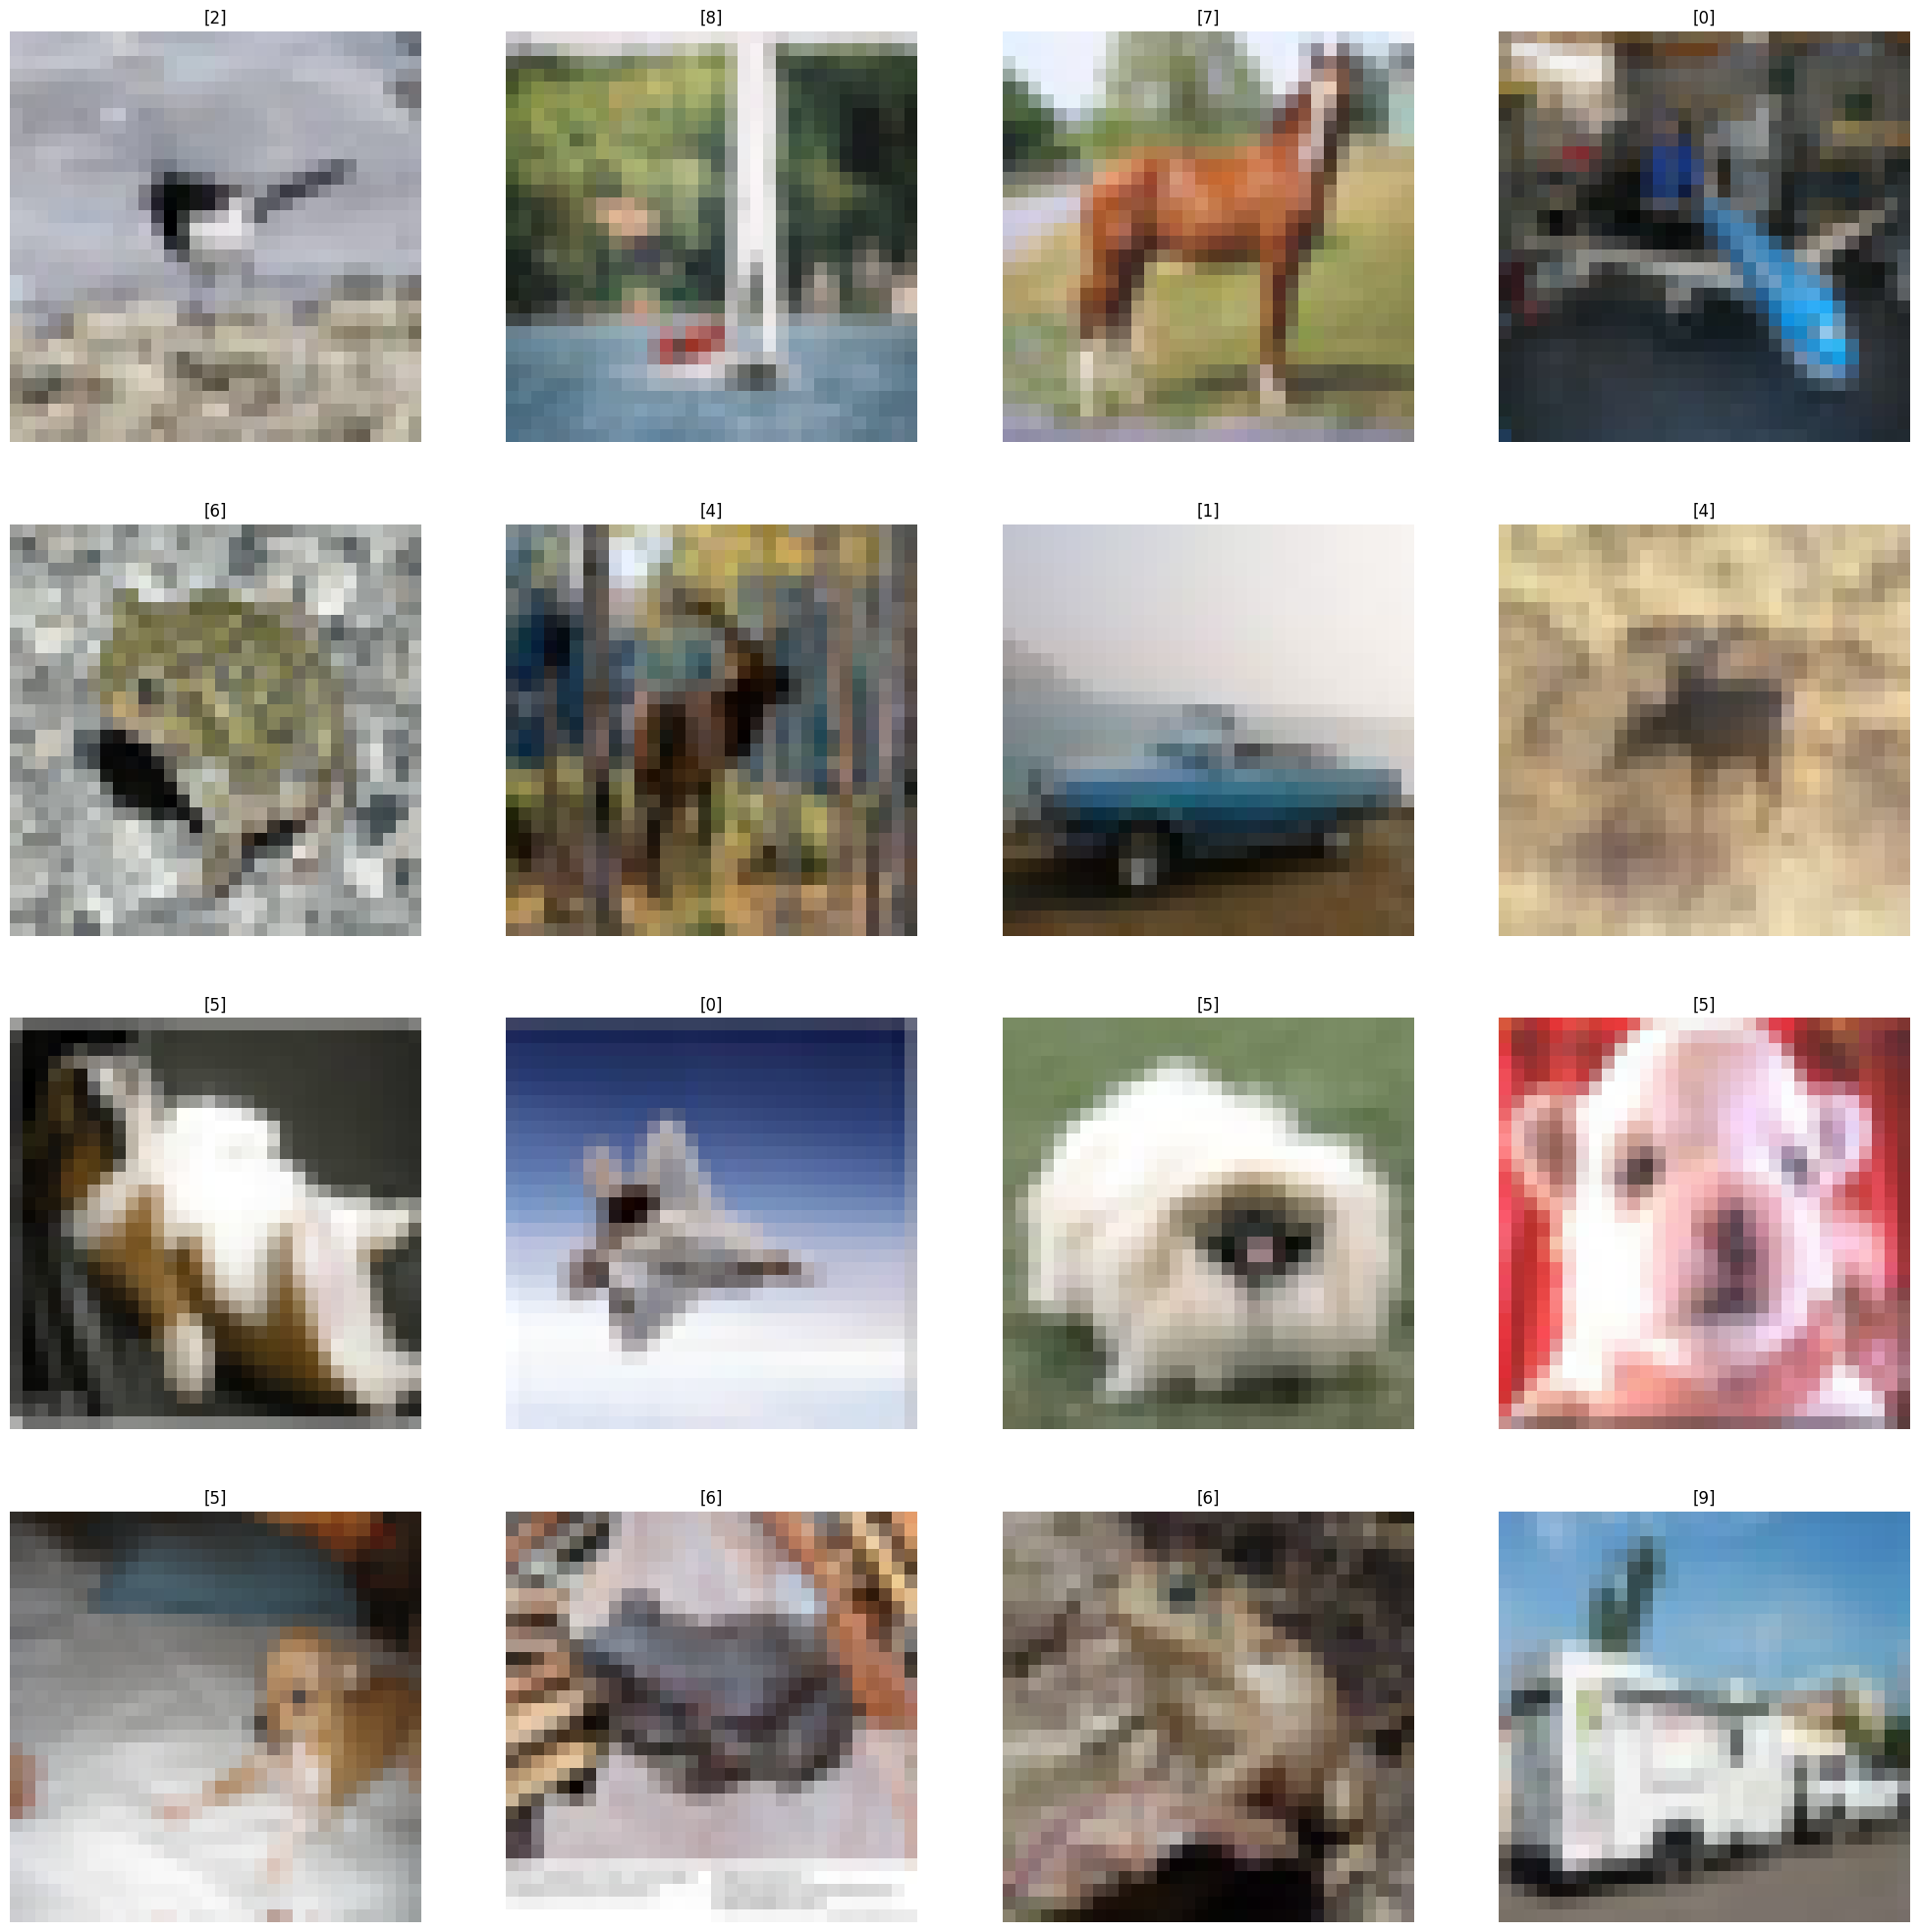

In [ ]:
W_grid = 4
L_grid = 4
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()
n_training = len(TrainIn)
for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training) # pick a random number
  axes[i].imshow(TrainIn[index])
  axes[i].set_title(TrainOut[index])
  axes[i].axis('off')

In [ ]:
plt.subplots_adjust(hspace = 0.4)

<Figure size 640x480 with 0 Axes>

In [ ]:
img_rows, img_cols = 32, 32
num_classes=10
train_dataset = TrainIn.astype('float32')
test_dataset = TestIn.astype('float32')
train_dataset /= 255
test_dataset /= 255

In [ ]:
print('train_dataset shape:', TrainIn.shape)
print(TrainIn.shape[0], 'train samples')
print(TestIn.shape[0], 'test samples')

train_dataset shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
train_labels = keras.utils.to_categorical(TrainOut, num_classes)
test_labels = keras.utils.to_categorical(TestOut, num_classes)

In [ ]:
np.random.seed(123)
vasthu=Sequential()

In [ ]:
vasthu.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
vasthu.add(Conv2D(32,(3,3), activation='relu'))
vasthu.add(MaxPooling2D(pool_size=(2,2)))
vasthu.add(Conv2D(64,(3,3), activation='relu'))
vasthu.add(Conv2D(64,(3,3), activation='relu'))
vasthu.add(MaxPooling2D(pool_size=(2,2)))
vasthu.add(Flatten())
vasthu.add(Dense(10, activation='softmax'))
vasthu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
TrainingLog=vasthu.fit(train_dataset, train_labels, epochs=10, validation_split = 0.1)

Epoch 1/10
1407/1407 [==============================] - 169s 119ms/step - loss: 1.5380 - accuracy: 0.4454 - val_loss: 1.3223 - val_accuracy: 0.5326
Epoch 2/10
1407/1407 [==============================] - 164s 116ms/step - loss: 1.1313 - accuracy: 0.6016 - val_loss: 1.0413 - val_accuracy: 0.6350
Epoch 3/10
1407/1407 [==============================] - 167s 118ms/step - loss: 0.9651 - accuracy: 0.6590 - val_loss: 0.9290 - val_accuracy: 0.6788
Epoch 4/10
1407/1407 [==============================] - 162s 115ms/step - loss: 0.8713 - accuracy: 0.6934 - val_loss: 0.8993 - val_accuracy: 0.6960
Epoch 5/10
1407/1407 [==============================] - 166s 118ms/step - loss: 0.8007 - accuracy: 0.7194 - val_loss: 0.8295 - val_accuracy: 0.7114
Epoch 6/10
1407/1407 [==============================] - 164s 117ms/step - loss: 0.7514 - accuracy: 0.7378 - val_loss: 0.7715 - val_accuracy: 0.7368
Epoch 7/10
1407/1407 [==============================] - 163s 116ms/step - loss: 0.7065 - accuracy: 0.7534 - val_

Text(0.5, 1.0, 'Performance of Normal-CNN')

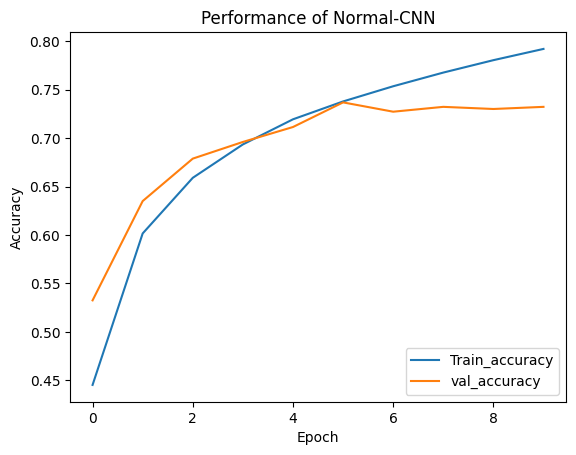

In [ ]:
plt.plot(TrainingLog.history['accuracy'], label='Train_accuracy')
plt.plot(TrainingLog.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Performance of Normal-CNN')

In [ ]:
vasthu.evaluate(test_dataset, test_labels)

313/313 [==============================] - 9s 29ms/step - loss: 0.8195 - accuracy: 0.7200


[0.8195139765739441, 0.7200000286102295]

In [ ]:
evaluation = vasthu.evaluate(test_dataset, test_labels)
print('Test Accuracy: {}'.format(evaluation[1]))
predicted_classes = vasthu.predict(test_dataset)

313/313 [==============================] - 9s 29ms/step - loss: 0.8195 - accuracy: 0.7200
Test Accuracy: 0.7200000286102295
313/313 [==============================] - 14s 45ms/step


In [ ]:
predicted_classes=tensorflow.argmax(predicted_classes,axis=1)

In [ ]:
test_labels = test_labels.argmax(1)

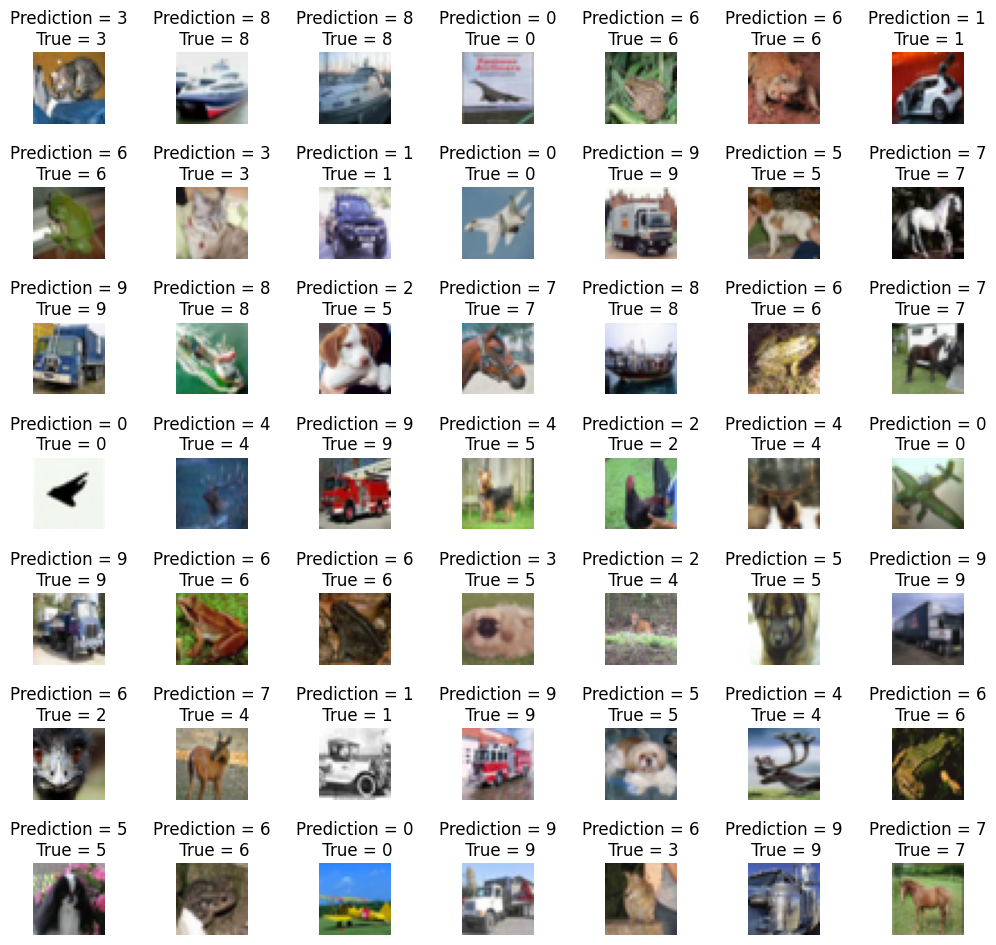

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
  axes[i].imshow(test_dataset[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], test_labels[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

<Axes: >

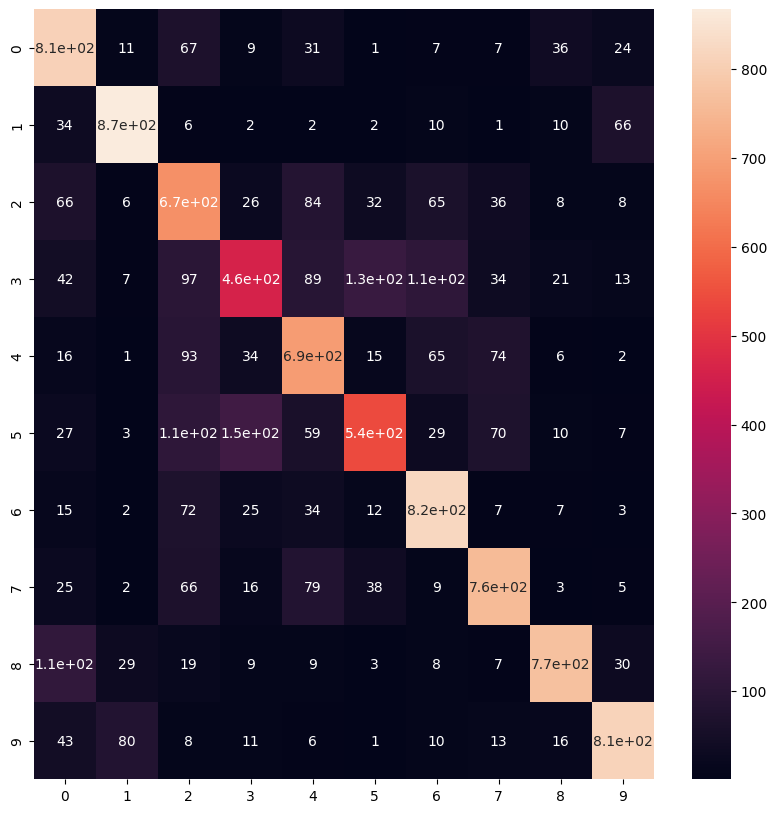

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_labels, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)